In [1]:
pip install opencv-python-headless

  Using cached opencv-python-headless-4.11.0.86.tar.gz (95.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for opencv-python-headless: filename=opencv_python_headless-4.11.0.86-cp39-cp39-macosx_12_0_arm64.whl size=13160593 sha256=3d19df004a0a78b161286b823973f71364bd75b2d488d78b607d6a7523f3fb1d
  Stored in directory: /Users/wangzongnan/Library/Caches/pip/wheels/c9/42/84/3a205494ef5ac996fcf74e1b02ae7fe4ea4d1218bf069b5c21
Successfully built opencv-python-headless

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


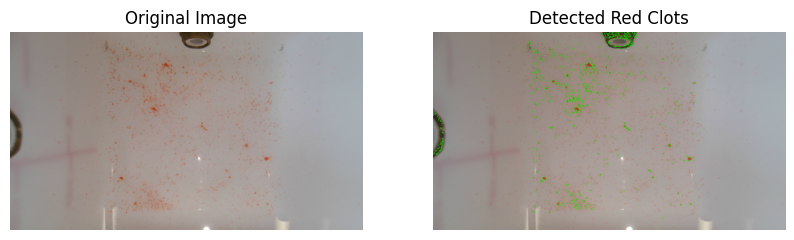

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'original_image.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define an optimized red color range
lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([15, 255, 255])
lower_red2 = np.array([165, 100, 50])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = mask1 + mask2

# Apply Gaussian blur to smooth edges and improve detection
red_mask = cv2.GaussianBlur(red_mask, (3, 3), 0)

# Reduce morphological operations for finer details
kernel = np.ones((2, 2), np.uint8)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel, iterations=1)

# Find contours of red clots
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
output_image = image_rgb.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# Display the output
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Red Clots')
plt.imshow(output_image)
plt.axis('off')

plt.show()
